# Project Objective Summary


The goal of this project is to develop a machine learning model capable of predicting podcast listening time in minutes. Using features such as episode length, genre, host and guest popularity, publication time, number of ads, and episode sentiment, the model aims to accurately estimate how long users will engage with a podcast episode. This can help creators and platforms optimize content strategy and improve user experience.

This is based on a Kaggle competition which can be found here: https://www.kaggle.com/competitions/playground-series-s5e4/overview

Load Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Load the data
df = pd.read_csv("tabela_final_limpa.csv")
print(df.shape)

# Convert Listening_Time_minutes to numeric
df['Listening_Time_minutes'] = pd.to_numeric(df['Listening_Time_minutes'], errors='coerce')

# Transform the "Episode_Sentiment" column into numeric
df['Episode_Sentiment'] = df['Episode_Sentiment'].map({
    'Negative': 0,
    'Neutral': 1,
    'Positive': 2
})

# Drop irrelevant columns as the data is duplicated
df = df.drop(labels=['Podcast_Name','Episode_Title'], axis=1)

print(df.shape)

(708144, 11)
(708144, 9)


### Data Cleaning

In [ ]:
# Remove episodes where listening time is greater than episode duration
df = df[df['Listening_Time_minutes'] <= df['Episode_Length_minutes']]

# Remove entries with Listening_Time_minutes <= 0
df = df[df['Listening_Time_minutes'] > 0]

# Remove outliers from "Number_of_Ads"
df = df[df['Number_of_Ads'] <= 103]

# Remove outliers from "Episode_Length_minutes"
df = df[df['Episode_Length_minutes'] <= 180]

# Remove outliers from "Listening_Time_minutes"
df = df[df['Listening_Time_minutes'] <= 180]

# Remove rows where Listening_Time_minutes is NaN
df = df.dropna(subset=['Listening_Time_minutes'])

In [4]:
df

,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
9,107.26,Music,78.12,Monday,Evening,78.12,1,2,103.560000
16,7.34,Technology,20.81,Sunday,Night,83.06,3,2,0.757830
25,113.68,Technology,38.49,Wednesday,Afternoon,28.53,0,2,112.680000
38,33.02,Sports,27.78,Wednesday,Morning,91.13,2,2,16.360000
44,31.69,Sports,24.80,Sunday,Evening,99.63,1,2,24.120000
...,...,...,...,...,...,...,...,...,...
708139,20.14,News,49.88,Sunday,Night,NaN,0,1,16.259360
708140,46.86,News,25.97,Monday,Night,35.15,2,1,33.727929
708141,47.10,News,69.34,Friday,Night,68.85,2,1,19.393583
708142,97.09,News,98.09,Friday,Morning,86.84,3,0,68.506777


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128875 entries, 9 to 708143
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Episode_Length_minutes       128875 non-null  float64
 1   Genre                        128875 non-null  object 
 2   Host_Popularity_percentage   128874 non-null  float64
 3   Publication_Day              128875 non-null  object 
 4   Publication_Time             128875 non-null  object 
 5   Guest_Popularity_percentage  109614 non-null  float64
 6   Number_of_Ads                128875 non-null  int64  
 7   Episode_Sentiment            128875 non-null  int64  
 8   Listening_Time_minutes       128875 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 9.8+ MB


In [6]:
df.describe().round(2)

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
count,128875.00,128874.00,109614.00,128875.00,128875.00,128875.00
mean,59.21,58.96,53.41,1.46,0.92,42.73
std,35.32,23.12,28.30,1.09,0.85,30.97
min,5.00,20.00,0.00,0.00,0.00,0.00
25%,29.82,38.12,30.12,1.00,0.00,16.23
50%,51.19,59.91,54.79,1.00,1.00,35.51
75%,92.85,78.60,78.06,2.00,2.00,64.41
max,161.66,100.00,100.00,12.00,2.00,119.97


In [7]:
df.isna().sum()

Episode_Length_minutes             0
Genre                              0
Host_Popularity_percentage         1
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    19261
Number_of_Ads                      0
Episode_Sentiment                  0
Listening_Time_minutes             0
dtype: int64

### Feature Distribution

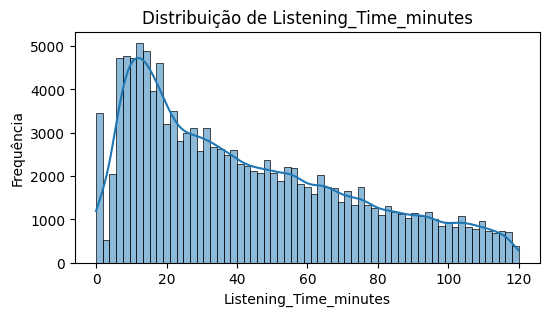

In [ ]:
# Distribution of variable "Listening_Time_minutes"
plt.figure(figsize=(6, 3))
sns.histplot(df['Listening_Time_minutes'], kde=True)
plt.title(f'Distribuição de Listening_Time_minutes')
plt.xlabel('Listening_Time_minutes')
plt.ylabel('Frequência')
plt.show()

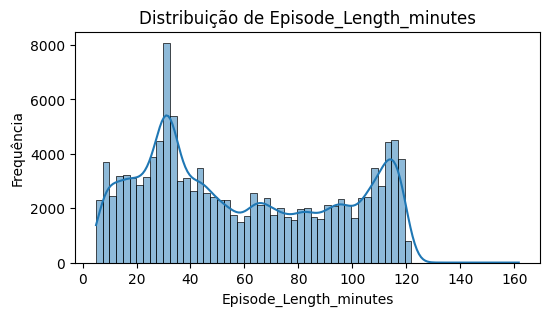

In [ ]:
# Episode_length_minutes"
plt.figure(figsize=(6, 3))
sns.histplot(df['Episode_Length_minutes'], kde=True)
plt.title(f'Distribuição de Episode_Length_minutes')
plt.xlabel('Episode_Length_minutes')
plt.ylabel('Frequência')
plt.show()

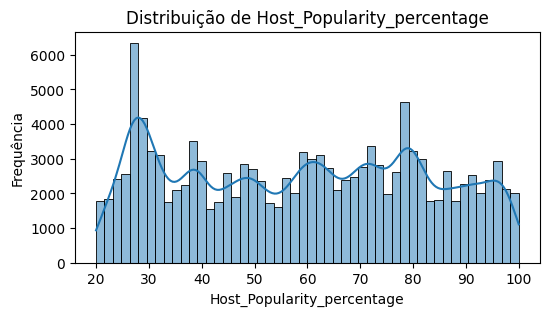

In [ ]:
# "Host_Popularity_percentage"
plt.figure(figsize=(6, 3))
sns.histplot(df['Host_Popularity_percentage'], kde=True)
plt.title(f'Distribuição de Host_Popularity_percentage')
plt.xlabel('Host_Popularity_percentage')
plt.ylabel('Frequência')
plt.show()

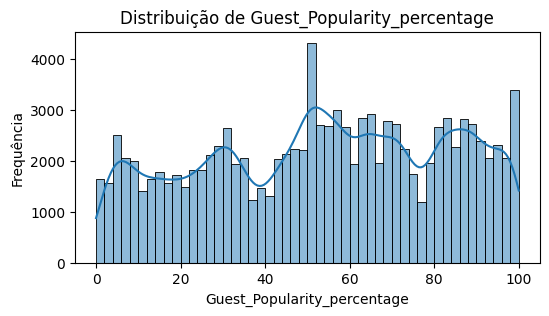

In [ ]:
# "Guest_Popularity_percentage"
plt.figure(figsize=(6, 3))
sns.histplot(df['Guest_Popularity_percentage'], kde=True)
plt.title(f'Distribuição de Guest_Popularity_percentage')
plt.xlabel('Guest_Popularity_percentage')
plt.ylabel('Frequência')
plt.show()

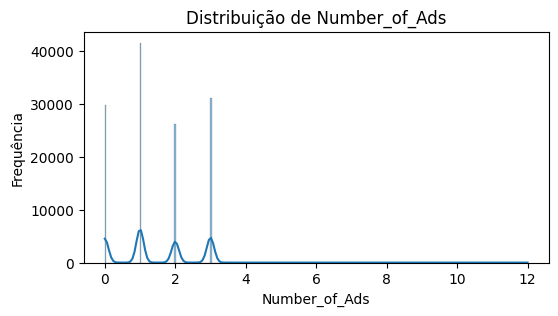

In [ ]:
# "Number_of_Ads"
plt.figure(figsize=(6, 3))
sns.histplot(df['Number_of_Ads'], kde=True)
plt.title(f'Distribuição de Number_of_Ads')
plt.xlabel('Number_of_Ads')
plt.ylabel('Frequência')
plt.show()

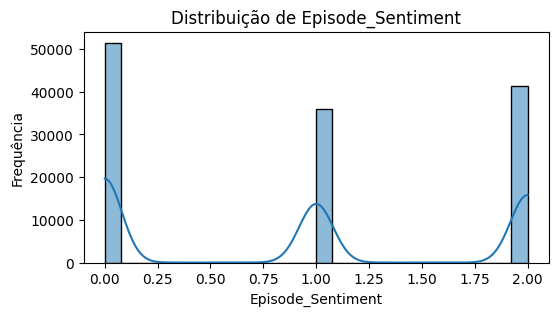

In [ ]:
# 'Episode_Sentiment'
plt.figure(figsize=(6, 3))
sns.histplot(df['Episode_Sentiment'], kde=True)
plt.title(f'Distribuição de Episode_Sentiment')
plt.xlabel('Episode_Sentiment')
plt.ylabel('Frequência')
plt.show()

In [ ]:
# Count values of categorical variables
categorical_vars = ['Genre', 'Publication_Time', 'Publication_Day']

# Count percentage values for each categorical variable
for var in categorical_vars:
    print(f"Value count for {var}:")
    print(df[var].value_counts(normalize=True) * 100)
    print("\n")

Contagem de valores para Genre:
Genre
Technology    13.497575
Sports        11.953443
True Crime    10.735984
Comedy        10.611057
Lifestyle     10.280504
Business       9.776140
Health         9.046751
News           8.547818
Music          8.142774
Education      7.407953
Name: proportion, dtype: float64


Contagem de valores para Publication_Time:
Publication_Time
Night        26.278952
Morning      25.706305
Evening      24.926479
Afternoon    23.088264
Name: proportion, dtype: float64


Contagem de valores para Publication_Day:
Publication_Day
Thursday     16.733269
Sunday       16.000776
Friday       15.251212
Monday       14.216101
Tuesday      13.274103
Wednesday    12.281668
Saturday     12.242871
Name: proportion, dtype: float64




### Feature correlation

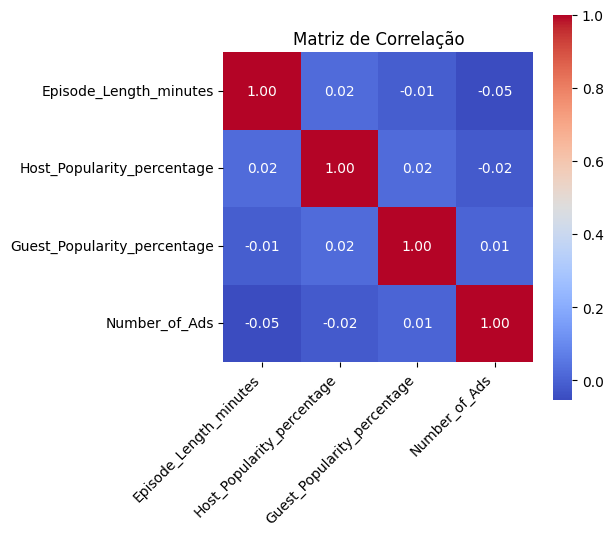

In [4]:
# imprimir matriz de correlação de X_train para colunas numéricas
# Filtrar apenas as colunas numéricas
num_cols = df.select_dtypes(include=['number']).columns

# Criar a matriz de correlação
plt.figure(figsize=(5, 5))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.xticks(rotation=45, ha='right')
plt.title("Matriz de Correlação")
plt.show()

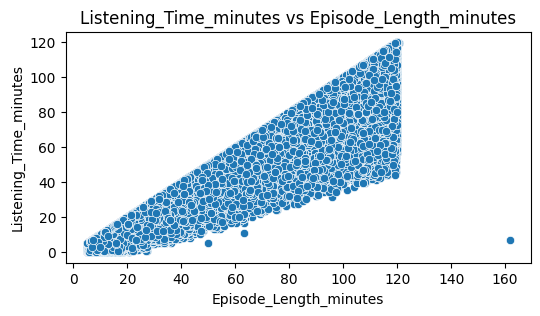

In [ ]:
# "Listening_Time_minutes" vs "Episode_Length_minutes"
plt.figure(figsize=(6, 3))
sns.scatterplot(data=df, x='Episode_Length_minutes', y='Listening_Time_minutes')
plt.title('Listening_Time_minutes vs Episode_Length_minutes')
plt.xlabel('Episode_Length_minutes')
plt.ylabel('Listening_Time_minutes')
plt.show()

### Principal Component Analysis

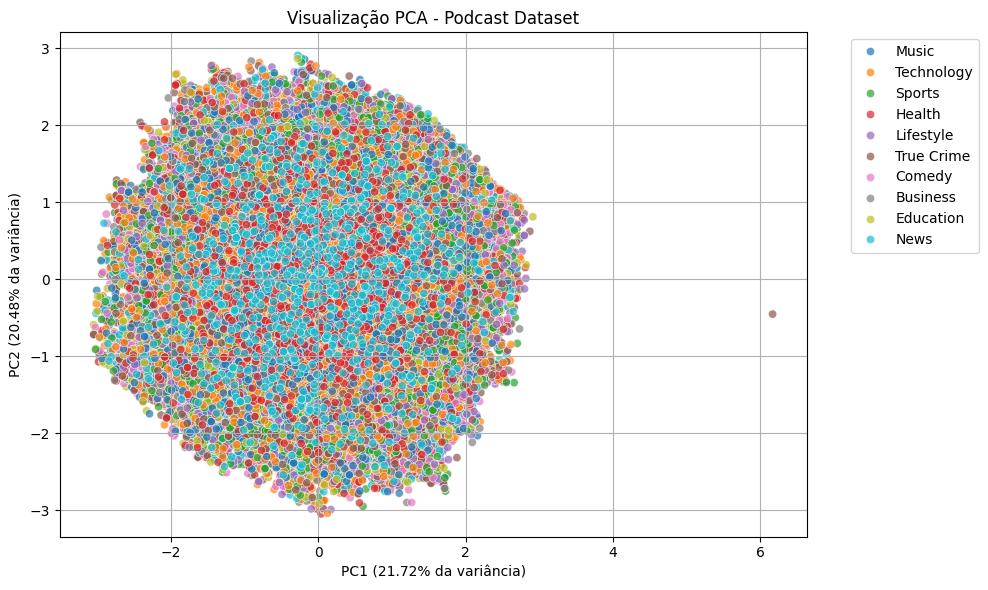

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que df seja seu DataFrame já tratado
# Selecione apenas colunas numéricas para PCA
numeric_cols = ['Episode_Length_minutes', 'Host_Popularity_percentage', 'Guest_Popularity_percentage',
                'Number_of_Ads', 'Episode_Sentiment']  # Adicione outras se forem numéricas

X = df[numeric_cols].dropna()

# Padronizar as variáveis (necessário para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Criar DataFrame com resultados do PCA
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Genre'] = df.loc[X.index, 'Genre'].values  # Ajuste aqui a variável que quiser colorir

# Plotar gráfico PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Genre', palette='tab10', alpha=0.7)
plt.title('Visualização PCA - Podcast Dataset')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% da variância)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% da variância)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


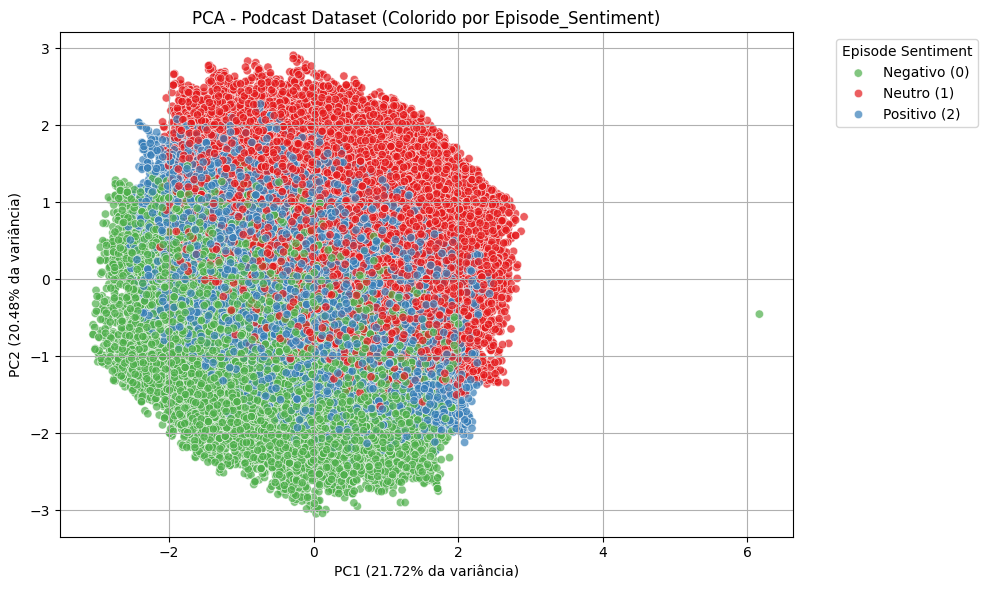

In [ ]:
# Selecionar colunas numéricas para PCA
numeric_cols = ['Episode_Length_minutes', 'Host_Popularity_percentage', 'Guest_Popularity_percentage',
                'Number_of_Ads', 'Episode_Sentiment']  # já incluindo o sentiment como número

X = df[numeric_cols].dropna()

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Criar DataFrame com os componentes principais
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Episode_Sentiment'] = df.loc[X.index, 'Episode_Sentiment'].values

# Plotar com seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_pca,
    x='PC1',
    y='PC2',
    hue='Episode_Sentiment',
    palette='Set1',
    alpha=0.7
)
plt.title('PCA - Podcast Dataset (Colorido por Episode_Sentiment)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% da variância)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% da variância)')
plt.legend(title='Episode Sentiment', labels=['Negativo (0)', 'Neutro (1)', 'Positivo (2)'],
           bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


### Statistical Testing

Average of target across different categories

In [17]:
# Checando a média de Listening_Time_minutes por features categoricas
df.groupby('Genre').agg({'Listening_Time_minutes': np.mean})

C:\Users\czset\AppData\Local\Temp\ipykernel_21532\2290577823.py:2: FutureWarning: The provided callable <function mean at 0x000001D0FBC00E00> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('Genre').agg({'Listening_Time_minutes': np.mean})


,Listening_Time_minutes
Genre,
Business,42.169603
Comedy,42.002400
Education,45.533005
Health,42.721460
Lifestyle,42.624015
Music,44.937561
News,42.087166
Sports,41.720337
Technology,42.931386


In [18]:
# realizar ANOVA para os grupos de 'genre'
from scipy.stats import f_oneway
grupos = [df[df['Genre'] == genero]['Listening_Time_minutes'].dropna() for genero in df['Genre'].unique()]

stat, p_valor = f_oneway(*grupos)

print(f'Estatística F: {stat:.4f}')
print(f'Valor-p: {p_valor:.4f}')

if p_valor < 0.05:
    print("Resultado: Há evidência estatística de que pelo menos um gênero tem média significativamente diferente.")
else:
    print("Resultado: Não há evidência estatística de diferença significativa entre as médias dos gêneros.")

Estatística F: 19.5336
Valor-p: 0.0000
Resultado: Há evidência estatística de que pelo menos um gênero tem média significativamente diferente.


In [19]:
from scipy.stats import ttest_ind

generos = [
    'Business', 'Comedy', 'Education', 'Health', 'Lifestyle',
    'Music', 'News', 'Sports', 'Technology', 'True Crime'
]

# Separando os dados de Education
education_data = df[df['Genre'] == 'Education']['Listening_Time_minutes'].dropna()

# Comparando Education com os outros gêneros
for genero in generos:
    if genero == 'Education':
        continue  # pula a comparação consigo mesmo

    genero_data = df[df['Genre'] == genero]['Listening_Time_minutes'].dropna()

    stat, p_valor = ttest_ind(education_data, genero_data, equal_var=False)

    if p_valor < 0.05:
        print(f'Diferença significativa entre Education e {genero} (p = {p_valor:.4f})')


Diferença significativa entre Education e Business (p = 0.0000)
Diferença significativa entre Education e Comedy (p = 0.0000)
Diferença significativa entre Education e Health (p = 0.0000)
Diferença significativa entre Education e Lifestyle (p = 0.0000)
Diferença significativa entre Education e News (p = 0.0000)
Diferença significativa entre Education e Sports (p = 0.0000)
Diferença significativa entre Education e Technology (p = 0.0000)
Diferença significativa entre Education e True Crime (p = 0.0000)


In [20]:
df.groupby('Publication_Day').agg({'Listening_Time_minutes': np.mean})

C:\Users\czset\AppData\Local\Temp\ipykernel_21532\2084997277.py:1: FutureWarning: The provided callable <function mean at 0x000001D0FBC00E00> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('Publication_Day').agg({'Listening_Time_minutes': np.mean})


,Listening_Time_minutes
Publication_Day,
Friday,43.284370
Monday,43.236771
Saturday,44.197461
Sunday,43.979985
Thursday,41.617791
Tuesday,42.570094
Wednesday,40.086288


In [21]:
df.groupby('Publication_Time').agg({'Listening_Time_minutes': np.mean})

C:\Users\czset\AppData\Local\Temp\ipykernel_21532\3729182979.py:1: FutureWarning: The provided callable <function mean at 0x000001D0FBC00E00> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('Publication_Time').agg({'Listening_Time_minutes': np.mean})


,Listening_Time_minutes
Publication_Time,
Afternoon,42.431873
Evening,43.377717
Morning,42.784367
Night,42.340465


In [22]:
df.groupby('Episode_Sentiment').agg({'Listening_Time_minutes': np.mean})

C:\Users\czset\AppData\Local\Temp\ipykernel_21532\759229415.py:1: FutureWarning: The provided callable <function mean at 0x000001D0FBC00E00> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('Episode_Sentiment').agg({'Listening_Time_minutes': np.mean})


,Listening_Time_minutes
Episode_Sentiment,
0,41.327738
1,43.980335
2,43.399402


In [23]:
# Separando os grupos
grupo_0 = df[df['Episode_Sentiment'] == 0]['Listening_Time_minutes'].dropna()
grupo_1 = df[df['Episode_Sentiment'] == 1]['Listening_Time_minutes'].dropna()
grupo_2 = df[df['Episode_Sentiment'] == 2]['Listening_Time_minutes'].dropna()

# Grupo 0 vs Grupo 1
stat_01, p_01 = ttest_ind(grupo_0, grupo_1, equal_var=False)
# Grupo 0 vs Grupo 2
stat_02, p_02 = ttest_ind(grupo_0, grupo_2, equal_var=False)
# Grupo 1 vs Grupo 2
stat_12, p_12 = ttest_ind(grupo_1, grupo_2, equal_var=False)

# Resultados
print(f"Comparação 0 vs 1: p = {p_01:.4f} {'✅ Significativo' if p_01 < 0.05 else '❌ Não significativo'}")
print(f"Comparação 0 vs 2: p = {p_02:.4f} {'✅ Significativo' if p_02 < 0.05 else '❌ Não significativo'}")
print(f"Comparação 1 vs 2: p = {p_12:.4f} {'✅ Significativo' if p_12 < 0.05 else '❌ Não significativo'}")

Comparação 0 vs 1: p = 0.0000 ✅ Significativo
Comparação 0 vs 2: p = 0.0000 ✅ Significativo
Comparação 1 vs 2: p = 0.0101 ✅ Significativo


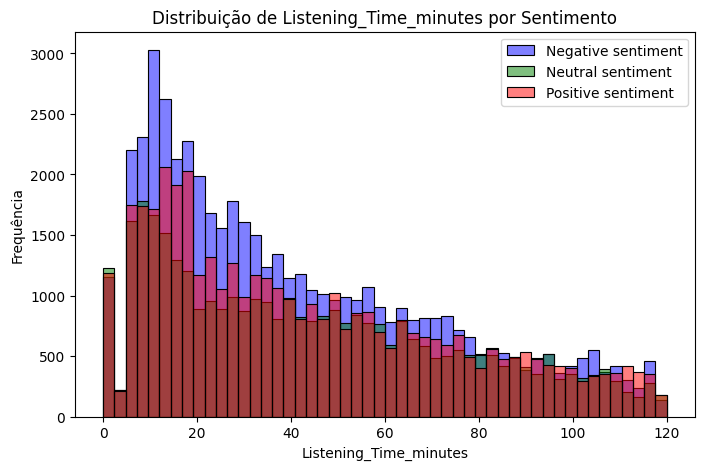

In [24]:
# Aqui vamos checar se existe diferenças na distribuiçao de Listening_Time_minutes para os diferentes valores de Episode_Sentiment
plt.figure(figsize=(8, 5))

# Histograma para Episode_Sentiment == 0
sns.histplot(df[df['Episode_Sentiment'] == 0]['Listening_Time_minutes'], bins=50, kde=False, color='blue', label='Negative sentiment', alpha=0.5)

# Histograma para Episode_Sentiment == 1
sns.histplot(df[df['Episode_Sentiment'] == 1]['Listening_Time_minutes'], bins=50, kde=False, color='green', label='Neutral sentiment', alpha=0.5)

# Histograma para Episode_Sentiment == 2
sns.histplot(df[df['Episode_Sentiment'] == 2]['Listening_Time_minutes'], bins=50, kde=False, color='red', label='Positive sentiment', alpha=0.5)

plt.title('Distribuição de Listening_Time_minutes por Sentimento')
plt.xlabel('Listening_Time_minutes')
plt.ylabel('Frequência')
plt.legend()  # Exibe legenda para identificação dos histogramas
plt.show()


### Preparing Data for Model

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Listening_Time_minutes') 
y = df['Listening_Time_minutes']

# remover colunas categoricas que nao usaremos
categorial_all = X.select_dtypes(include='object').columns
categorial_to_drop = [col for col in categorial_all if col not in categorical_vars]
X = X.drop(columns=categorial_to_drop)

# Dividindo em treino (80%) e validação (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# Verificando o tamanho de cada conjunto
print(f"Tamanho do treino: {len(X_train)}")
print(f"Tamanho da validação: {len(X_val)}")


Tamanho do treino: 103100
Tamanho da validação: 25775


In [12]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Transformando os dados categóricos
X_train_encoded = encoder.fit_transform(X_train[categorical_vars])
X_val_encoded = encoder.transform(X_val[categorical_vars])

# Convertendo para DataFrame e concatenando com as features numéricas
X_train_encoded = pd.DataFrame(X_train_encoded, index=X_train.index, columns=encoder.get_feature_names_out(categorical_vars))
X_val_encoded = pd.DataFrame(X_val_encoded, index=X_val.index, columns=encoder.get_feature_names_out(categorical_vars))

X_train = pd.concat([X_train.drop(columns=categorical_vars), X_train_encoded], axis=1)
X_val = pd.concat([X_val.drop(columns=categorical_vars), X_val_encoded], axis=1)

### Baseline Random Forest

Tempo de treinamento:  17.8 segundos
RMSE Treino: 3.91
RMSE Val: 10.02
R² Treino: 0.98
R² Val: 0.90


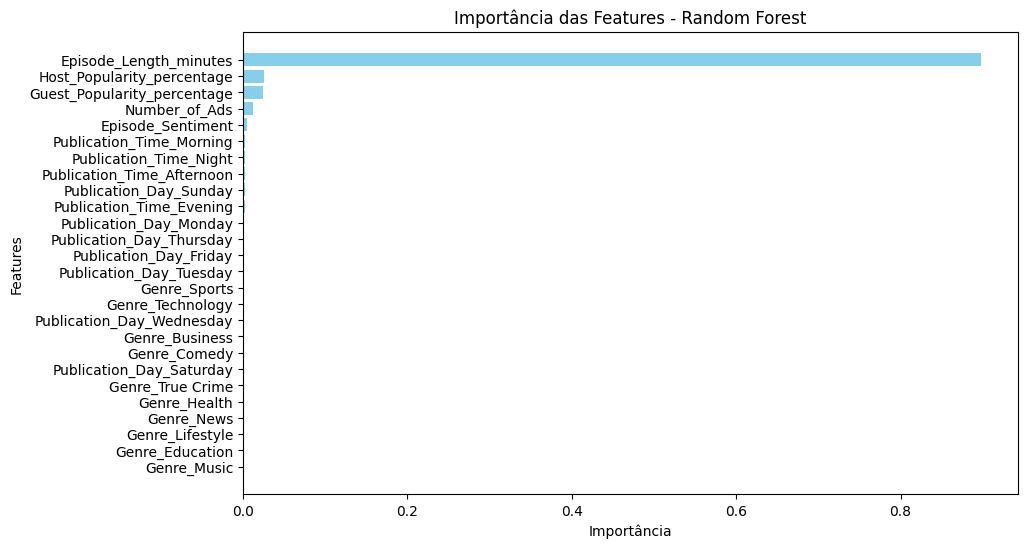

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import time
# Criando e treinando o modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=30, random_state=42, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, bootstrap=True,)

start_time = time.time()
rf_model.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print("Tempo de treinamento: ", round(training_time,1), 'segundos')

# Fazendo previsões
y_pred_train = rf_model.predict(X_train)
y_pred_val = rf_model.predict(X_val)

# Calculando o RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

print(f"RMSE Treino: {rmse_train:.2f}")
print(f"RMSE Val: {rmse_val:.2f}")

# Calculando o R²
r2_train = r2_score(y_train, y_pred_train)
r2_val = r2_score(y_val, y_pred_val)


print(f"R² Treino: {r2_train:.2f}")
print(f"R² Val: {r2_val:.2f}")


# Importância das Features
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Visualizando importâncias das features
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('Importância das Features - Random Forest')
plt.gca().invert_yaxis()
plt.show()

### Weights application

Tempo de treinamento:  19.5 segundos
RMSE Treino: 3.90
RMSE Val: 9.97
R² Treino: 0.98
R² Val: 0.90


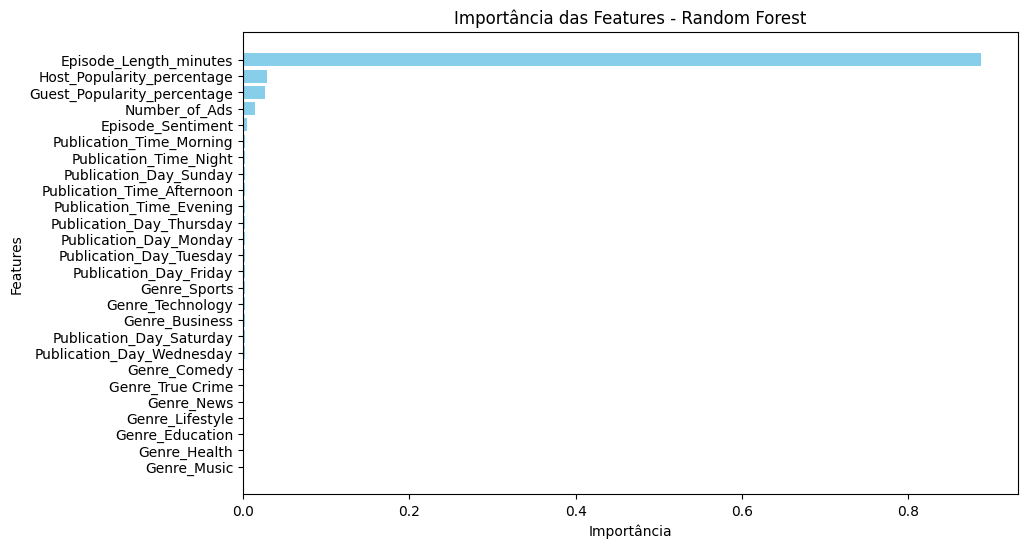

In [35]:
# Criar pesos com base em Episode_Length_minutes
pesos = np.where(X_train['Episode_Length_minutes'] > 90, 2.0, 1.0)

# Treinar modelo com pesos
rf_model = RandomForestRegressor(n_estimators=30, random_state=42, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, bootstrap=True,)

start_time = time.time()
rf_model.fit(X_train, y_train,sample_weight=pesos)
end_time = time.time()
training_time = end_time - start_time
print("Tempo de treinamento: ", round(training_time,1), 'segundos')

# Fazendo previsões
y_pred_train = rf_model.predict(X_train)
y_pred_val = rf_model.predict(X_val)

# Calculando o RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

print(f"RMSE Treino: {rmse_train:.2f}")
print(f"RMSE Val: {rmse_val:.2f}")

# Calculando o R²
r2_train = r2_score(y_train, y_pred_train)
r2_val = r2_score(y_val, y_pred_val)


print(f"R² Treino: {r2_train:.2f}")
print(f"R² Val: {r2_val:.2f}")


# Importância das Features
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Visualizando importâncias das features
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('Importância das Features - Random Forest')
plt.gca().invert_yaxis()
plt.show()


### RMSE x n_estimators

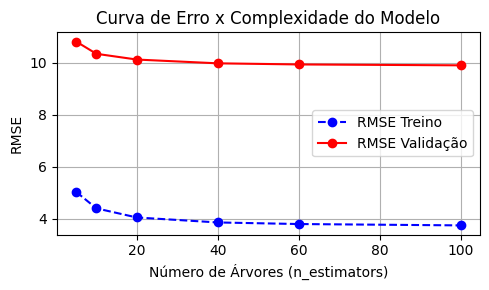

In [81]:
# Valores crescentes de complexidade (número de árvores)
n_estimators_range = [5, 10, 20, 40, 60, 100]

rmse_train_list = []
rmse_val_list = []

# Loop sobre diferentes complexidades
for n in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

    rmse_train_list.append(rmse_train)
    rmse_val_list.append(rmse_val)

# Plotando curva de erro vs complexidade
plt.figure(figsize=(5,3))
plt.plot(n_estimators_range, rmse_train_list, marker='o', label='RMSE Treino', linestyle='--', color='blue')
plt.plot(n_estimators_range, rmse_val_list, marker='o', label='RMSE Validação', linestyle='-', color='red')

plt.xlabel('Número de Árvores (n_estimators)')
plt.ylabel('RMSE')
plt.title('Curva de Erro x Complexidade do Modelo')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### RMSE inspection

In [25]:
# Recria a série de gêneros com base nos índices da validação
genres_val = df.loc[y_val.index, 'Genre']

# Junta os dados em um DataFrame
df_resultados = pd.DataFrame({
    'y_real': y_val,
    'y_pred': y_pred_val,
    'Genre': genres_val
})

# Calcula o RMSE por grupo de gênero
rmse_por_genero = df_resultados.groupby('Genre').apply(
    lambda grupo: round(np.sqrt(mean_squared_error(grupo['y_real'], grupo['y_pred'])),2)
).reset_index(name='RMSE')

# Ordena do maior para o menor erro
rmse_por_genero = rmse_por_genero.sort_values(by='RMSE', ascending=False)

# Exibe a tabela
rmse_por_genero


C:\Users\czset\AppData\Local\Temp\ipykernel_11348\1788211489.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rmse_por_genero = df_resultados.groupby('Genre').apply(


,Genre,RMSE
5,Music,10.53
2,Education,10.37
4,Lifestyle,10.25
0,Business,10.24
9,True Crime,10.17
1,Comedy,10.16
6,News,10.14
3,Health,10.11
7,Sports,9.61
8,Technology,9.09


In [26]:
# Recria a série de gêneros com base nos índices da validação
retrieve_index = df.loc[y_val.index, 'Publication_Day']

# Junta os dados em um DataFrame
df_resultados = pd.DataFrame({
    'y_real': y_val,
    'y_pred': y_pred_val,
    'Publication_Day': retrieve_index
})

# Calcula o RMSE por grupo de gênero
rmse_by_group = df_resultados.groupby('Publication_Day').apply(
    lambda grupo: round(np.sqrt(mean_squared_error(grupo['y_real'], grupo['y_pred'])),2)
).reset_index(name='RMSE')

# Ordena do maior para o menor erro
rmse_by_group = rmse_by_group.sort_values(by='RMSE', ascending=False)

# Exibe a tabela
rmse_by_group


C:\Users\czset\AppData\Local\Temp\ipykernel_11348\1119044533.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rmse_by_group = df_resultados.groupby('Publication_Day').apply(


,Publication_Day,RMSE
6,Wednesday,10.35
2,Saturday,10.30
3,Sunday,10.10
1,Monday,10.09
0,Friday,9.95
5,Tuesday,9.86
4,Thursday,9.59


In [27]:
# Recria a série de gêneros com base nos índices da validação
retrieve_index = df.loc[y_val.index, 'Publication_Time']

# Junta os dados em um DataFrame
df_resultados = pd.DataFrame({
    'y_real': y_val,
    'y_pred': y_pred_val,
    'Publication_Time': retrieve_index
})

# Calcula o RMSE por grupo de gênero
rmse_by_group = df_resultados.groupby('Publication_Time').apply(
    lambda grupo: round(np.sqrt(mean_squared_error(grupo['y_real'], grupo['y_pred'])),2)
).reset_index(name='RMSE')

# Ordena do maior para o menor erro
rmse_by_group = rmse_by_group.sort_values(by='RMSE', ascending=False)

# Exibe a tabela
rmse_by_group


C:\Users\czset\AppData\Local\Temp\ipykernel_11348\3414005676.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rmse_by_group = df_resultados.groupby('Publication_Time').apply(


,Publication_Time,RMSE
1,Evening,10.43
0,Afternoon,10.06
3,Night,9.84
2,Morning,9.73


In [28]:
# Recria a série de gêneros com base nos índices da validação
retrieve_index = df.loc[y_val.index, 'Episode_Sentiment']

# Junta os dados em um DataFrame
df_resultados = pd.DataFrame({
    'y_real': y_val,
    'y_pred': y_pred_val,
    'Episode_Sentiment': retrieve_index
})

# Calcula o RMSE por grupo de gênero
rmse_by_group = df_resultados.groupby('Episode_Sentiment').apply(
    lambda grupo: round(np.sqrt(mean_squared_error(grupo['y_real'], grupo['y_pred'])),2)
).reset_index(name='RMSE')

# Ordena do maior para o menor erro
rmse_by_group = rmse_by_group.sort_values(by='RMSE', ascending=False)

# Exibe a tabela
rmse_by_group


C:\Users\czset\AppData\Local\Temp\ipykernel_11348\2251892362.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rmse_by_group = df_resultados.groupby('Episode_Sentiment').apply(


,Episode_Sentiment,RMSE
1,1,10.30
2,2,9.99
0,0,9.84


C:\Users\czset\AppData\Local\Temp\ipykernel_11348\3433387897.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_result.groupby(bins).apply(lambda g: pd.Series({


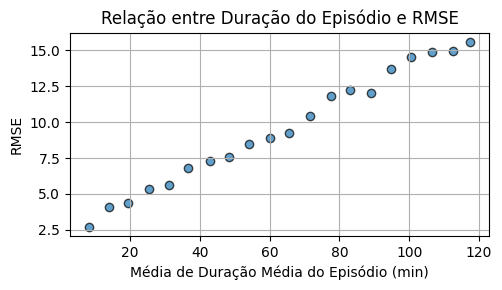

In [29]:
# Recriar a coluna Episode_Length_minutes para o conjunto de validação
episode_lengths_val = df.loc[y_val.index, 'Episode_Length_minutes']

# Montar o DataFrame com as variáveis necessárias
df_result = pd.DataFrame({
    'y_real': y_val,
    'y_pred': y_pred_val,
    'Episode_Length_minutes': episode_lengths_val
})

# Definir faixas (bins) de duração dos episódios
bins = pd.cut(df_result['Episode_Length_minutes'], bins=20)  

# Agrupar por faixa e calcular RMSE e valor médio de duração
grouped = df_result.groupby(bins).apply(lambda g: pd.Series({
    'RMSE': np.sqrt(mean_squared_error(g['y_real'], g['y_pred'])),
    'Episode_Length_avg': g['Episode_Length_minutes'].mean()
})).reset_index(drop=True)

# Plotar o gráfico scatter
plt.figure(figsize=(5, 3))
plt.scatter(grouped['Episode_Length_avg'], grouped['RMSE'], alpha=0.7, edgecolor='k')
plt.xlabel('Média de Duração Média do Episódio (min)')
plt.ylabel('RMSE')
plt.title('Relação entre Duração do Episódio e RMSE')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\czset\AppData\Local\Temp\ipykernel_11348\1280171811.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_result.groupby(bins).apply(lambda g: pd.Series({


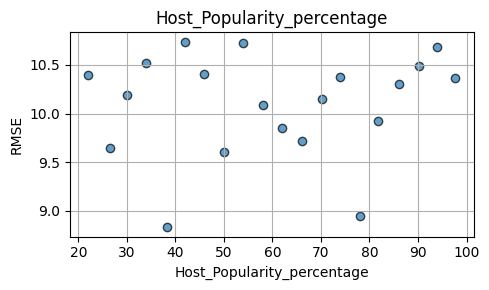

In [30]:
# Recriar a coluna Episode_Length_minutes para o conjunto de validação
retrieve_index = df.loc[y_val.index, 'Host_Popularity_percentage']

# Montar o DataFrame com as variáveis necessárias
df_result = pd.DataFrame({
    'y_real': y_val,
    'y_pred': y_pred_val,
    'Host_Popularity_percentage': retrieve_index
})

# Definir faixas (bins) de duração dos episódios
bins = pd.cut(df_result['Host_Popularity_percentage'], bins=20)  

# Agrupar por faixa e calcular RMSE e valor médio de duração
grouped = df_result.groupby(bins).apply(lambda g: pd.Series({
    'RMSE': np.sqrt(mean_squared_error(g['y_real'], g['y_pred'])),
    'group_avg': g['Host_Popularity_percentage'].mean()
})).reset_index(drop=True)

# Plotar o gráfico scatter
plt.figure(figsize=(5,3))
plt.scatter(grouped['group_avg'], grouped['RMSE'], alpha=0.7, edgecolor='k')
plt.xlabel('Host_Popularity_percentage')
plt.ylabel('RMSE')
plt.title('Host_Popularity_percentage')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\czset\AppData\Local\Temp\ipykernel_11348\704071005.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_result.groupby(bins).apply(lambda g: pd.Series({


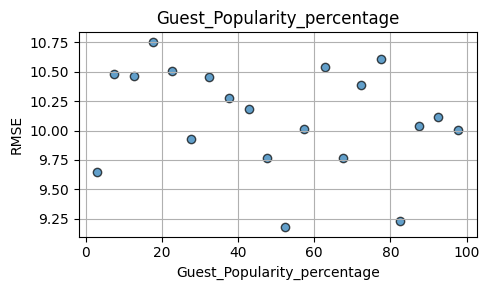

In [31]:
# Recriar a coluna Episode_Length_minutes para o conjunto de validação
retrieve_index = df.loc[y_val.index, 'Guest_Popularity_percentage']

# Montar o DataFrame com as variáveis necessárias
df_result = pd.DataFrame({
    'y_real': y_val,
    'y_pred': y_pred_val,
    'Guest_Popularity_percentage': retrieve_index
})

# Definir faixas (bins) de duração dos episódios
bins = pd.cut(df_result['Guest_Popularity_percentage'], bins=20)  

# Agrupar por faixa e calcular RMSE e valor médio de duração
grouped = df_result.groupby(bins).apply(lambda g: pd.Series({
    'RMSE': np.sqrt(mean_squared_error(g['y_real'], g['y_pred'])),
    'group_avg': g['Guest_Popularity_percentage'].mean()
})).reset_index(drop=True)

# Plotar o gráfico scatter
plt.figure(figsize=(5,3))
plt.scatter(grouped['group_avg'], grouped['RMSE'], alpha=0.7, edgecolor='k')
plt.xlabel('Guest_Popularity_percentage')
plt.ylabel('RMSE')
plt.title('Guest_Popularity_percentage')
plt.grid(True)
plt.tight_layout()
plt.show()


### Fine Tuning

### Grid Search 1
max_features, max_depth, min_samples_split, min_impurity_decrease, min_samples_leaf

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_features': [None , 0.5,'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 0.5, 4],
    'min_impurity_decrease': [0.0, 0.3],
    'min_samples_leaf': [1,3,5,10]

}

grid = GridSearchCV(RandomForestRegressor(
    n_estimators=30,
    criterion='squared_error',
    # max_depth=None,
    # min_samples_split=2,
    # min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    # max_features=1.0,
    max_leaf_nodes=None,
    # min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1, # paralelizar e acelerar o treinamento 
    random_state=42,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None
    ),
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    )

grid.fit(X_train, y_train)

print("Melhor valor refinado de max_features:", grid.best_params_['max_features'])
print("Melhor RMSE (validação cruzada):", -grid.best_score_)

Melhor valor refinado de max_features: 0.5
Melhor RMSE (validação cruzada): 10.0868287015437


In [32]:
# melhors parametros
grid.best_params_

{'max_depth': 30,
 'max_features': 0.5,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [33]:
# Validação
best_model_1 = grid.best_estimator_
y_pred_val = best_model_1.predict(X_val)

rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
r2_val = r2_score(y_val, y_pred_val)

print("RMSE validação:", rmse_val)
print(f"R² validação:{r2_val:.2f}")


RMSE validação: 9.955588515237311
R² validação:0.90


### Grid Search 2
max_features

In [34]:
best_params = grid.best_params_
best_params

{'max_depth': 30,
 'max_features': 0.5,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [35]:
param_grid = {
    'max_features': np.round(np.linspace(0.1,1.0,10),2)
}
grid_2 = GridSearchCV(estimator=RandomForestRegressor(
    n_estimators=30,
    max_depth=best_params.get('max_depth',None),
    min_impurity_decrease=best_params.get('min_impurity_decrease'),
    min_samples_leaf = best_params.get('min_samples_leaf',1),
    min_samples_split = best_params.get('min_samples_split',2),
    random_state=42,
    n_jobs=-1
),
param_grid=param_grid,
cv=5,
scoring = 'neg_root_mean_squared_error'
)

grid_2.fit(X_train, y_train)

print("Melhor valor refinado de max_features:", grid_2.best_params_['max_features'])
print("Melhor RMSE (validação cruzada):", -grid_2.best_score_)

Melhor valor refinado de max_features: 0.5
Melhor RMSE (validação cruzada): 10.013899464441984


In [36]:
# imprimir melhores parametros
grid_2.best_params_

{'max_features': np.float64(0.5)}

In [37]:
# Validação
best_model_2 = grid_2.best_estimator_
y_pred_val = best_model_2.predict(X_val)

rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
r2_val = r2_score(y_val, y_pred_val)

print("RMSE validação:", rmse_val)
print(f"R² validação:{r2_val:.2f}")

RMSE validação: 9.955588515237313
R² validação:0.90


### Grid Search 3
max_depth, n_estimators

In [38]:
# melhores parametros do grid 1
best_params = grid.best_params_
best_params

{'max_depth': 30,
 'max_features': 0.5,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [39]:
# melhores parametros do grid 2
best_params_2 = grid_2.best_params_
best_params_2


{'max_features': np.float64(0.5)}

In [40]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70],
    'n_estimators': [30,60,120,200,300,500]
}
grid_3 = GridSearchCV(estimator=RandomForestRegressor(
    # n_estimators=30,
    # max_depth=best_params.get('max_depth',None),
    min_impurity_decrease=best_params.get('min_impurity_decrease',0.0),
    min_samples_leaf = best_params.get('min_samples_leaf',1),
    min_samples_split = best_params.get('min_samples_split',2),
    max_features=best_params_2.get('max_features'),
    random_state=42,
    n_jobs=-1
),
param_grid=param_grid,
cv=5,
scoring = 'neg_root_mean_squared_error'
)

grid_3.fit(X_train, y_train)

print("Melhor valor refinado de max_depth:", grid_3.best_params_)
print("Melhor RMSE (validação cruzada):", -grid_3.best_score_)

Melhor valor refinado de max_depth: {'max_depth': 40, 'n_estimators': 500}
Melhor RMSE (validação cruzada): 9.915181646391739


In [41]:
# Validação
best_model_3 = grid_3.best_estimator_
y_pred_val = best_model_3.predict(X_val)

rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
r2_val = r2_score(y_val, y_pred_val)

print("RMSE validação:", rmse_val)
print(f"R² validação:{r2_val:.2f}")

RMSE validação: 9.830538749411948
R² validação:0.90
